# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
BASE_WIDTH = 4.8612
WIDTH_97 = BASE_WIDTH*0.97
WIDTH_85 = BASE_WIDTH*0.85

LEGEND_FONTSIZE = 8.0
TICKS_FONTSIZE = 8.0
AXIS_LABEL_FONTSIZE = 10.0

WOMPF = 1.3

# Loading Data

In [15]:
folder_name = "simulation_results"

file_names = {
    "baseline"         : "2023-04-07_16-22-42_CLASSICAL",
    "classical"        : "2023-04-07_16-22-03_CLASSICAL",
    "quantum-sim_cloud": "2023-04-07_16-31-26_QUANTUM_SIM_CLOUD",
    "quantum-hardware" : "2023-04-07_19-32-06_QUANTUM_HARDWARE"
}

colors = {
    "baseline": "#FB5607",
    "classical": "#88CB00", 
    "quantum-sim_cloud": "#7FB0FF",
    "quantum-hardware": "#8338EC"
}

style = {
    "baseline": "--",
    "classical": "-o", 
    "quantum-sim_cloud": "-o",
    "quantum-hardware": "-o"
}

In [7]:
sim_data = {}
for solver_type, file_name in file_names.items():
    full_path = f"{folder_name}/{file_name}.csv"
    print(f"Data for {solver_type} read from file {full_path}")

    sim_data[solver_type] = pd.read_csv(full_path, index_col=[0, 1])

Data for baseline read from file simulation_results/2023-04-07_16-22-42_CLASSICAL.csv
Data for classical read from file simulation_results/2023-04-07_16-22-03_CLASSICAL.csv
Data for quantum-sim_cloud read from file simulation_results/2023-04-07_16-31-26_QUANTUM_SIM_CLOUD.csv
Data for quantum-hardware read from file simulation_results/2023-04-07_19-32-06_QUANTUM_HARDWARE.csv


In [8]:
def configure_axis(axis, title=None):
    xticks       = [0      , 4      , 8      , 12     , 16     , 20     , 24     , 28     , 32     ]
    xtick_labels = ["04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00", "11:00", "12:00"]

    axis.grid(True)
    axis.set_xlabel("time")
    axis.set_ylabel("power [MW]")
    axis.set_xticks(xticks, xtick_labels)

    axis.set_xlim([-0.5, 32])

    if title:
        axis.set_title(title)

    axis.legend()

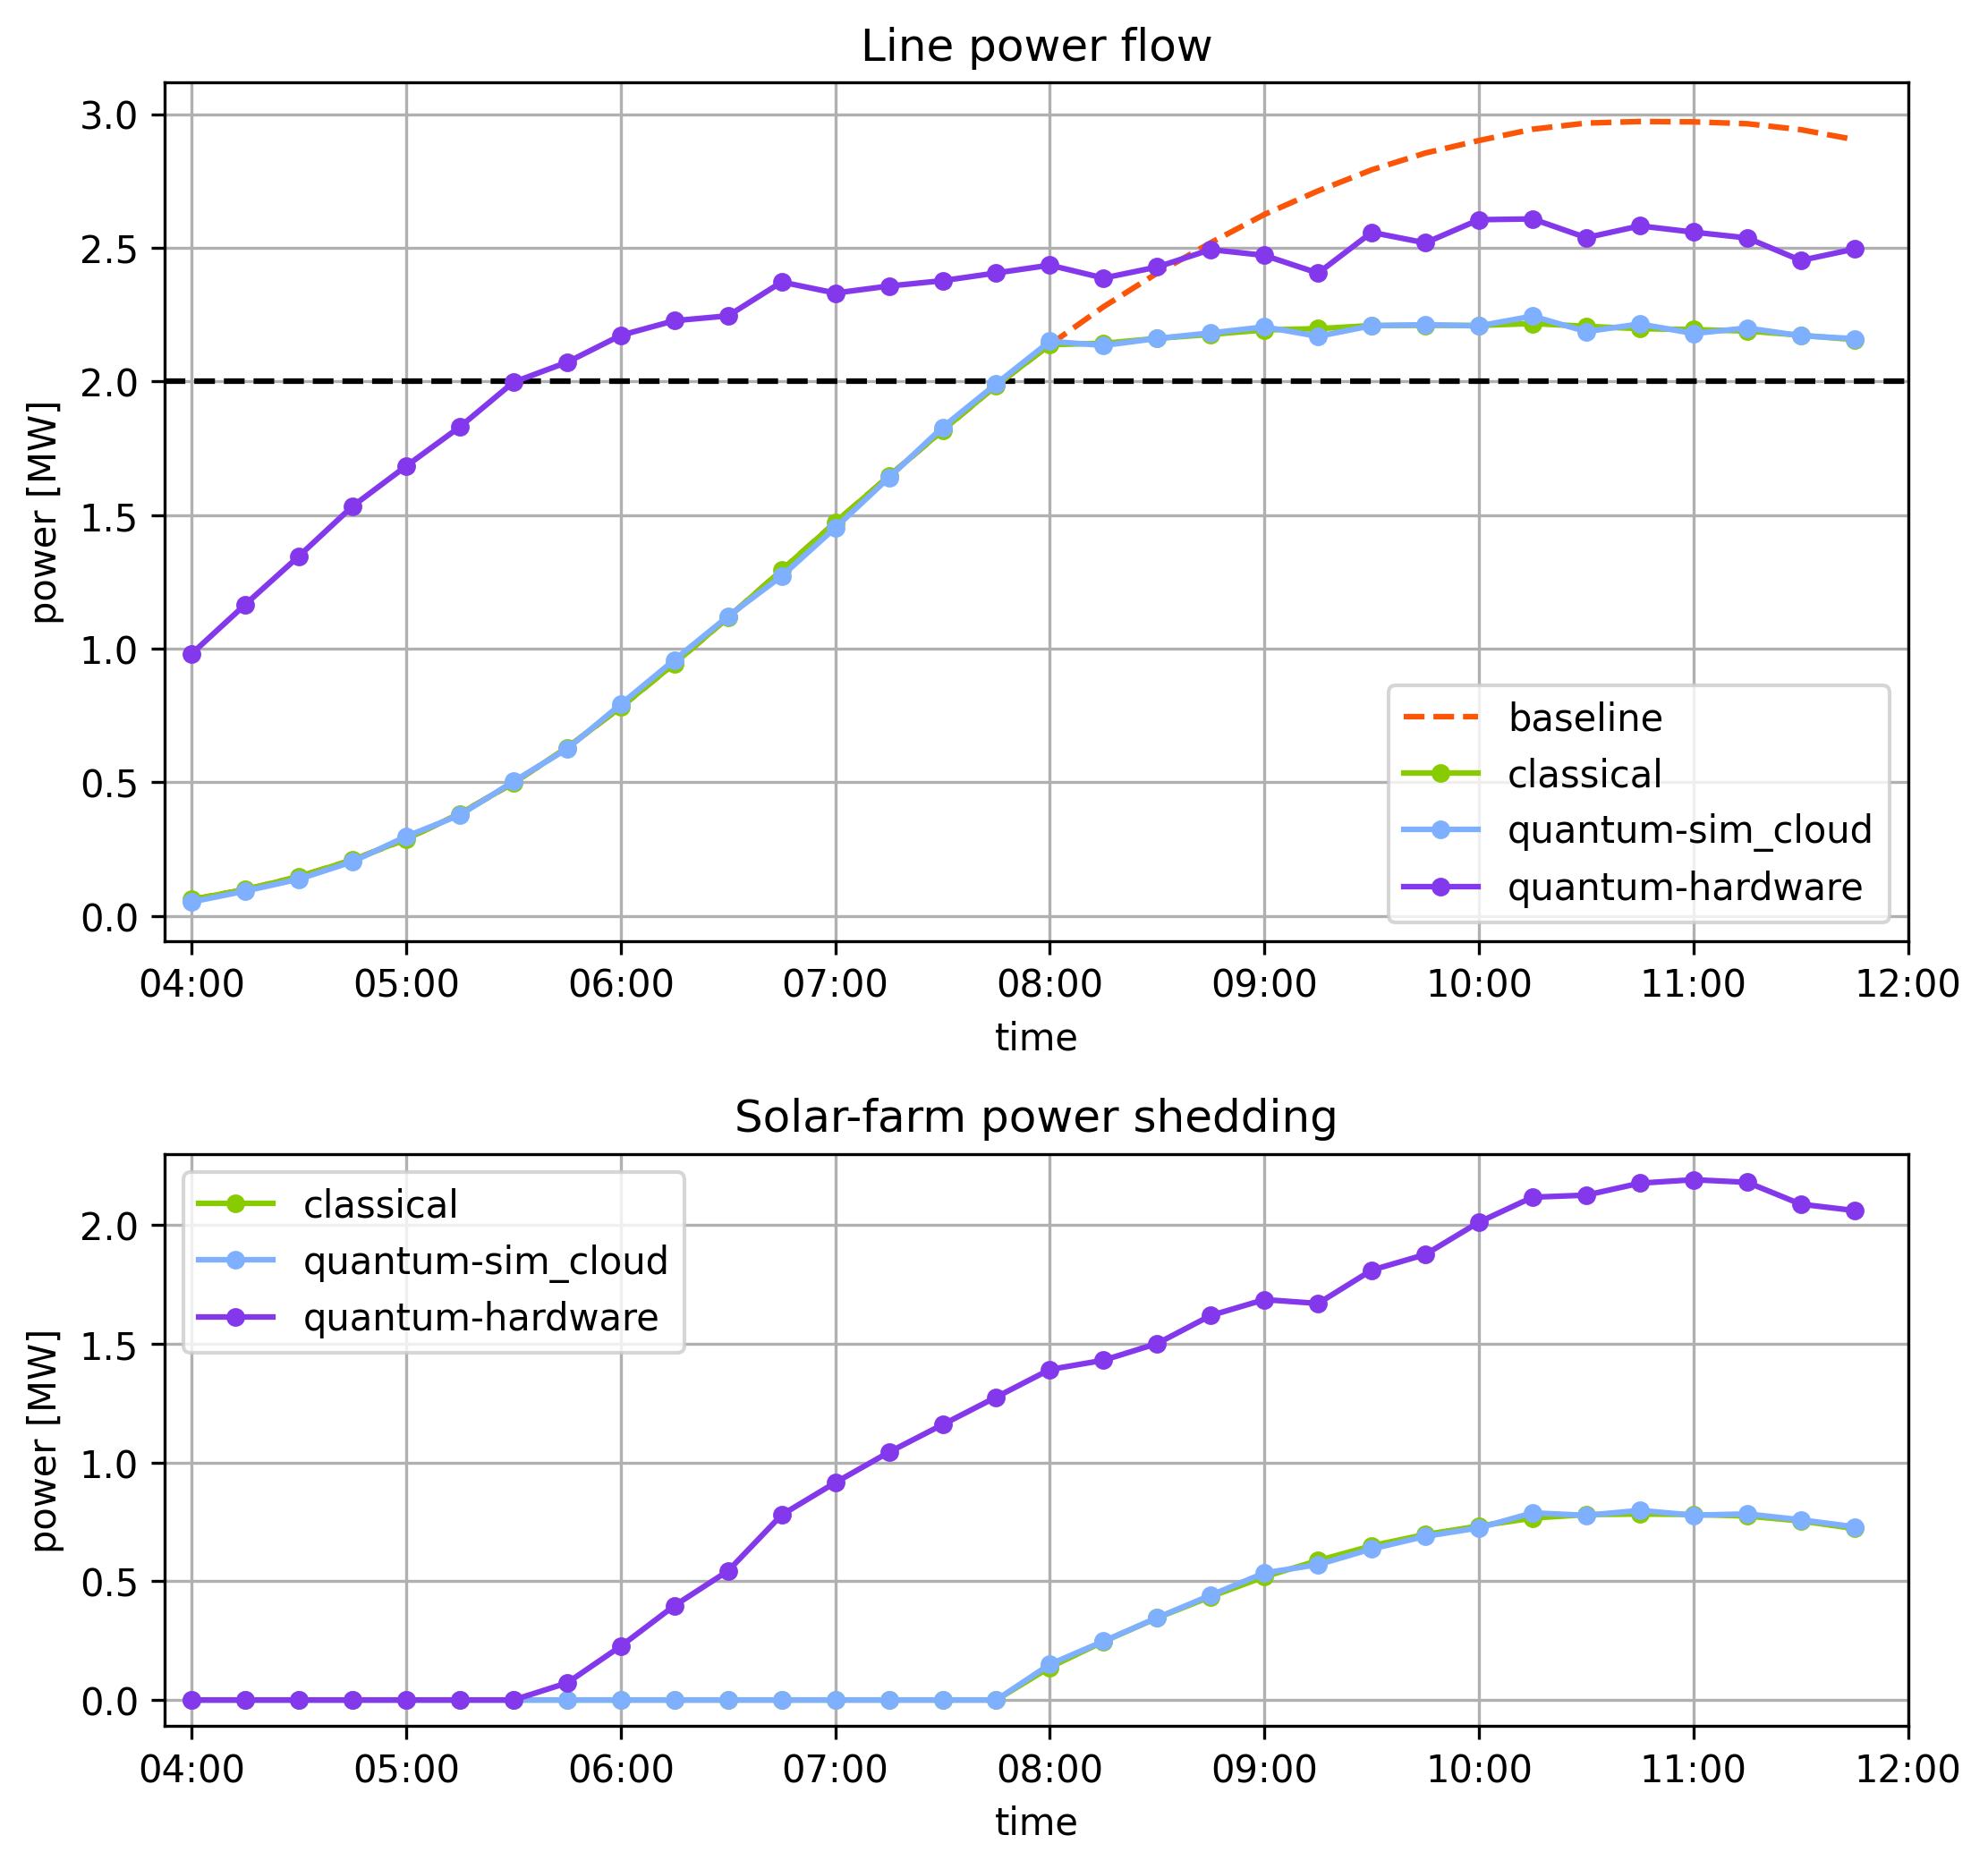

In [17]:
line_name = "GridSim-0.Grid-0Branch1-2"
monitor_name = "LineMonitorSim-0.LineMonitor-0"

figure, (axis_top, axis_bottom) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 2]},figsize=(WIDTH_97**WOMPF, 4.5**WOMPF), dpi=300)

axis_top.axhline(y=2.0, c="k", ls="--", lw=1.5)

for result_type, df in sim_data.items():
    line_flow = sim_data[result_type].loc[line_name, "P"]
    
    axis_top.plot(line_flow.index, line_flow.abs(), style[result_type], markersize=4.0, label=result_type, c=colors[result_type])

for result_type, df in sim_data.items():
    if result_type == "baseline":
        continue
    power_reduction = sim_data[result_type].loc[monitor_name, "power_reduction"]

    axis_bottom.plot(power_reduction.index, power_reduction.abs(), "-o", markersize=4.0, label=result_type, c=colors[result_type])

configure_axis(axis_top, "Line power flow")
configure_axis(axis_bottom, "Solar-farm power shedding")

figure.tight_layout()

# Distribution comparison

$$b=\begin{bmatrix}
    2.22 \\
    -0.48 \\
    -0.48 \\
    -1.45 \\
\end{bmatrix}$$

Number of shots: $10^5$

### Simulator (noise-free)
`ibmq_qasm_simulator`

In [3]:
distr_sim_no_noise = np.array([0.12675794, 0.0105554 , 0.21154264, 0.65114402])

### Simualtor (with noise)
`ibmq_qasm_simulator` with noise model of `ibm_lagos`

In [4]:
distr_sim_with_noise = np.array([0.27537611, 0.22372547, 0.25550506, 0.24539337])

### Quantum Computer
`ibm_lagos`

In [5]:
distr_quantum_hw = np.array([0.2460663 , 0.24412223, 0.26003929, 0.24977218])

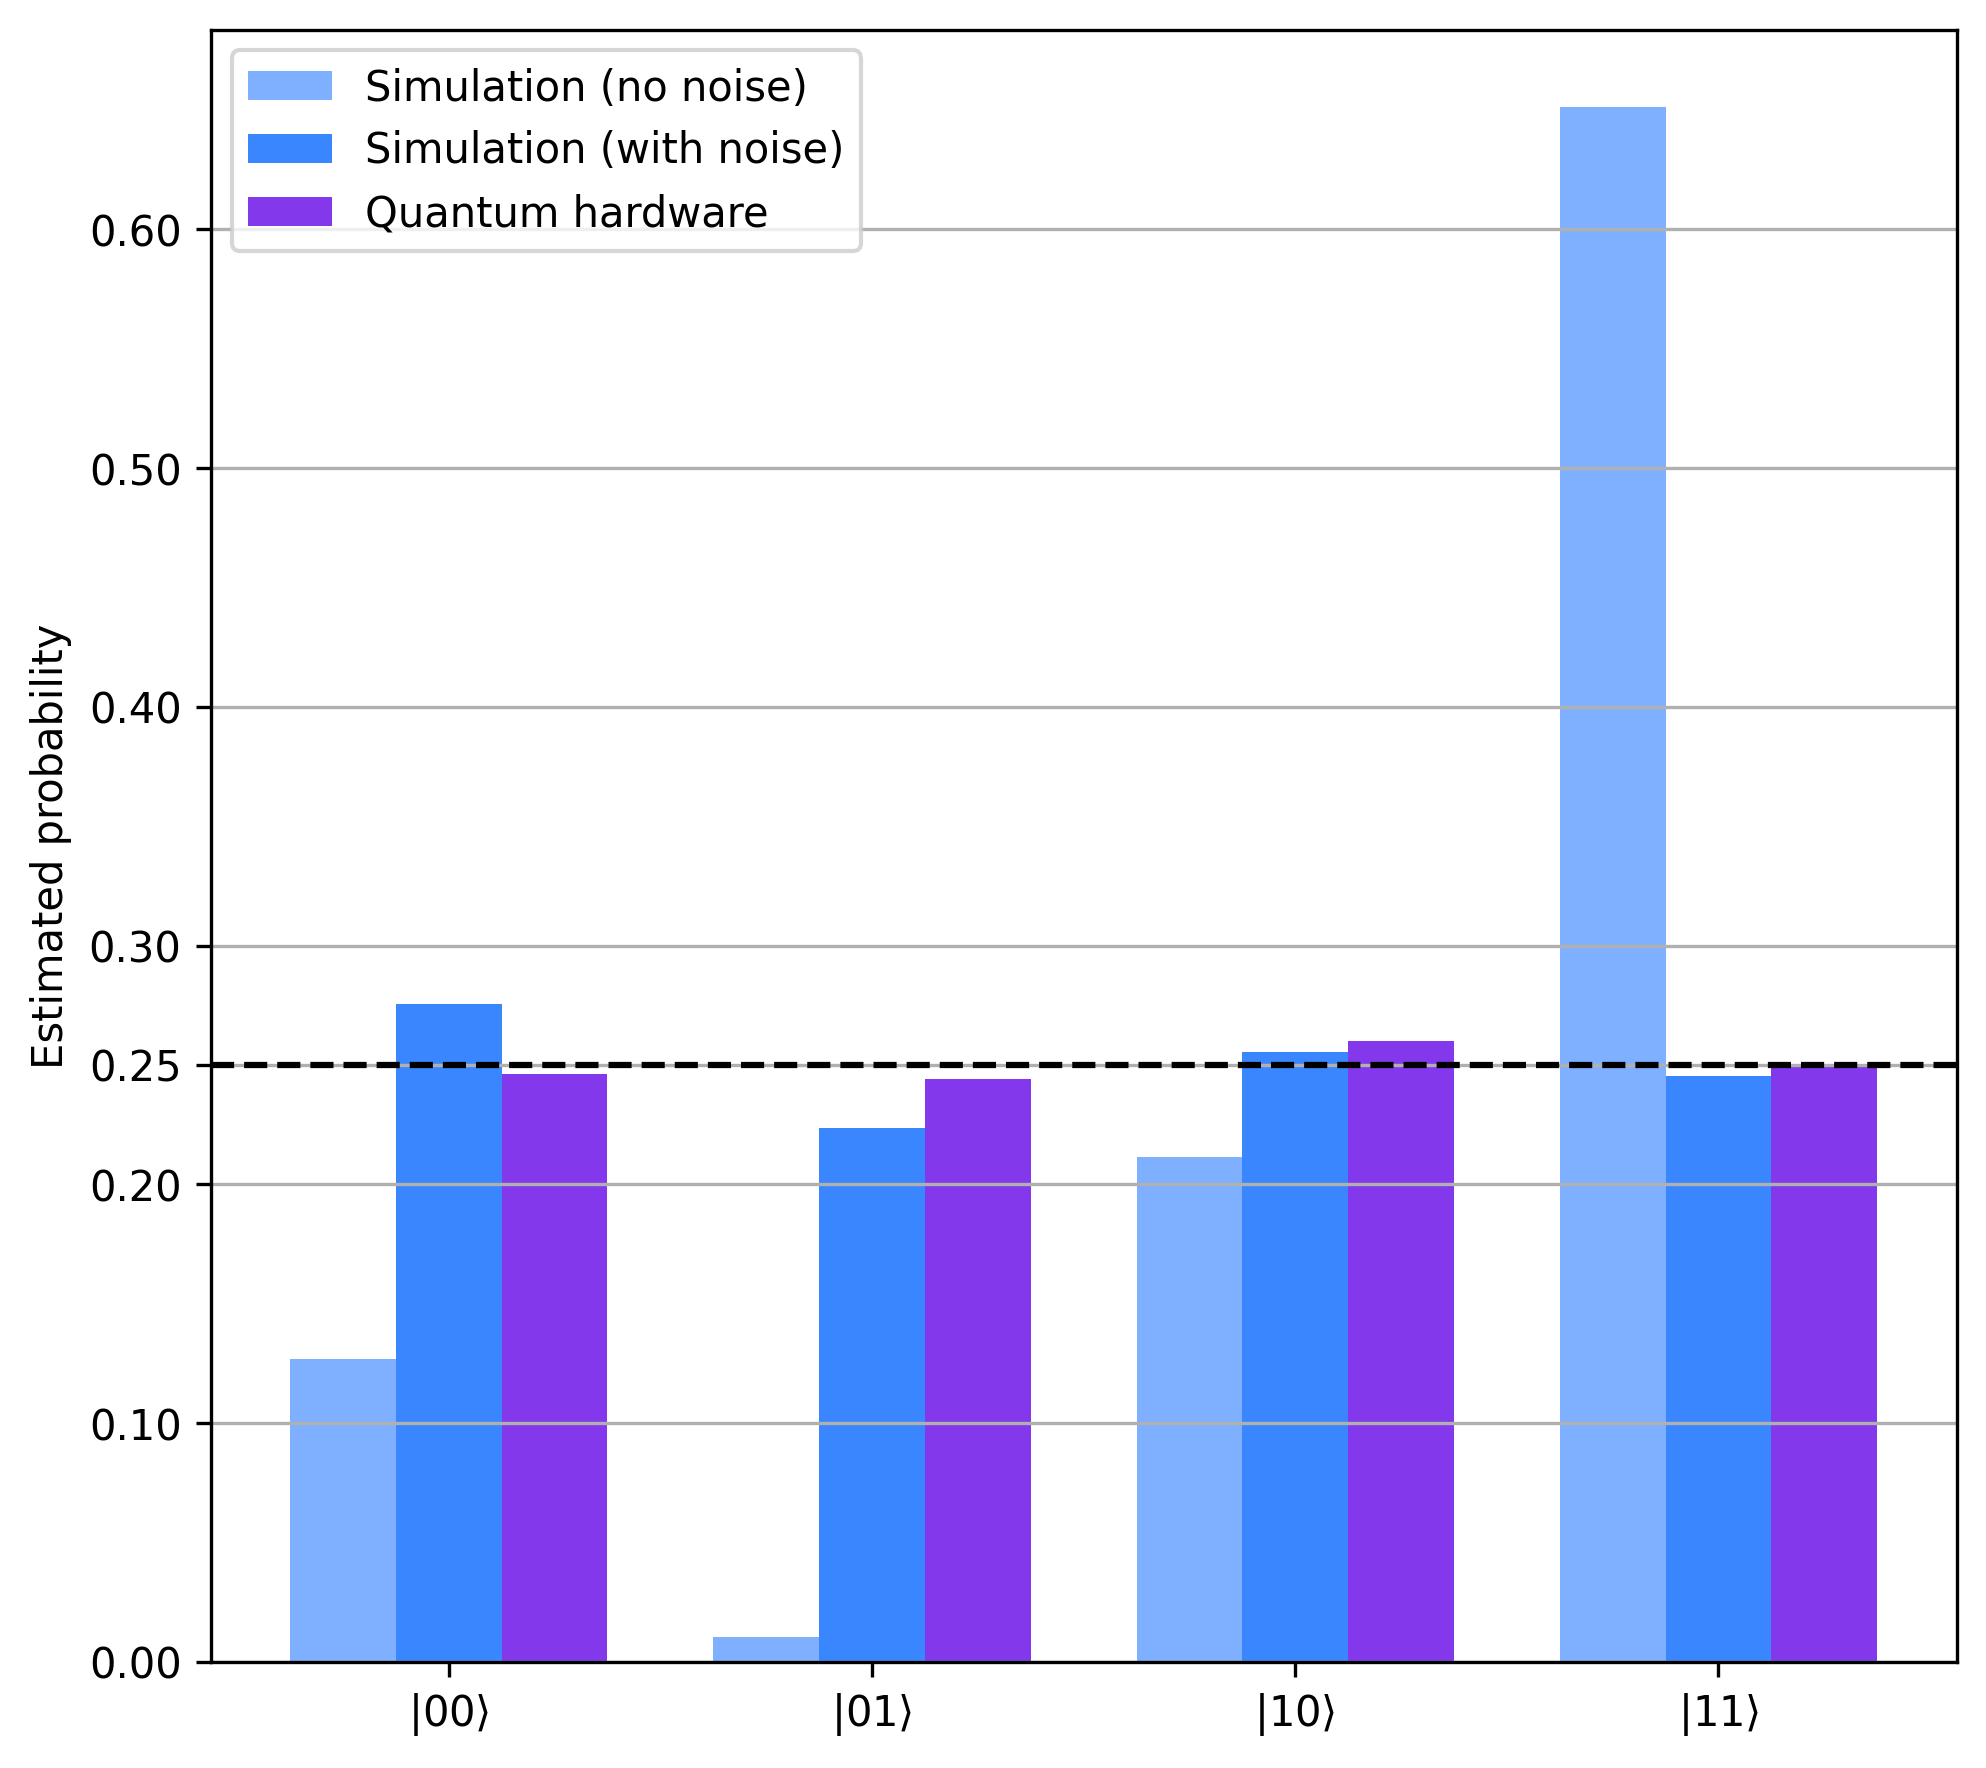

In [10]:
x_labels = [r'$|00\rangle$', r'$|01\rangle$', r'$|10\rangle$', r'$|11\rangle$']
x = np.arange(len(x_labels))
width = 0.25

fig, ax = plt.subplots(figsize=(WIDTH_97**WOMPF, 4.5**WOMPF), dpi=300)

# Add the data to the plot
ax.bar(x - width, distr_sim_no_noise, width, label='Quantum simulator (without noise)', color="#7FB0FF")
ax.bar(x, distr_sim_with_noise, width, label='Quantum simulator (with noise)', color="#3A86FF")
ax.bar(x + width, distr_quantum_hw, width, label='Quantum hardware', color="#8338EC")

# Set the labels and legend
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel('Estimated probability')
ax.legend()
ax.axhline(y=0.25, linestyle="--", c="k")
ax.yaxis.grid()
ax.set_yticks([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6])

# Display the plot
plt.show()